In [147]:
#  We discussed simple linear regression, multiple 
# linear regression, and polynomial regression. These models are special cases of the 
# generalized linear model, a flexible framework that requires fewer assumptions  
# than ordinary linear regression. In this chapter, we will discuss some of these 
# assumptions as they relate to another special case of the generalized linear model 
# called logistic regression.

# Topics Covered:
# 1. Logistic Regression
# 2. Calculating various cross_val scorings e.g. precision, recall, f1, auc etc
# 3. Plotting AUC curve
# 4. Hyperparameter tuning using Grid Search
# 5. 

In [148]:
%matplotlib inline
import pandas as pd
df = pd.read_csv("/home/topo/myRepos/github/mml_sklearn/datasets/smsspam/SMSSpamCollection", delimiter = '\t', header = None)

In [149]:
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [150]:
df.tail()

,0,1
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [151]:
print "spam count=", df[df[0]=='spam'][0].count()

spam count= 747


In [152]:
print "ham count=", df[df[0]=='ham'][0].count()

ham count= 4825


In [153]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

In [154]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])

In [155]:
df[0][:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: 0, dtype: object

In [156]:
df[1][:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: 1, dtype: object

In [157]:
#  TfidfVectorizer combines CountVectorizer and TfidfTransformer.
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
#X_test is to be just transformed from X_test_raw and not fit_transformed()
X_test = vectorizer.transform(X_test_raw)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(4179, 7399)
(1393, 7399)
(4179,)
(1393,)


In [158]:
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [159]:
preds = clf_logreg.predict(X_test)
print preds[:5]

['ham' 'ham' 'ham' 'spam' 'ham']


In [160]:
for i,prediction in enumerate(preds[:10]):
    print  'Prediction:%s and Message:%s' % (prediction, X_test_raw[i])

Prediction:ham and Message:Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Prediction:ham and Message:Ok lar... Joking wif u oni...
Prediction:ham and Message:Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Prediction:spam and Message:U dun say so early hor... U c already then say...


KeyError: 4

In [161]:
print df[1].shape
print df[0].shape


(5572,)
(5572,)


In [162]:
print df.shape

(5572, 2)


In [163]:
df[:2]

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [164]:
for i,j in enumerate(range(5,10)):
    #print i, j
    print "%d-num=%d" % (i, j*j)

0-num=25
1-num=36
2-num=49
3-num=64
4-num=81


In [165]:
print X_train_raw[1000]
print X_train_raw.shape

Aight will do, thanks again for comin out
(4179,)


In [166]:
X_test_raw.shape

(1393,)

In [167]:
# Measuring Accuracy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [168]:
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

In [169]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [170]:
conf_matrix

array([[4, 1],
       [2, 3]])

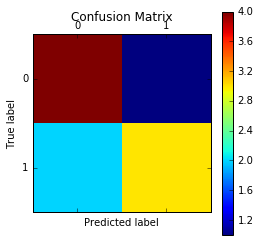

In [171]:
#print plot
plt.matshow(conf_matrix)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [172]:
from sklearn.metrics import accuracy_score
y_pred, y_true= [0,1,1,1], [1,1,1,1]
print 'Accuracy: ', accuracy_score(y_true, y_pred)

Accuracy:  0.75


In [173]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

In [174]:
df = pd.read_csv("/home/topo/myRepos/github/mml_sklearn/datasets/smsspam/SMSSpamCollection", delimiter = '\t', header = None)

In [175]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])

In [176]:
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [177]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [178]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [179]:
scores = cross_val_score(clf, X_test, y_test, cv=10)

In [180]:
print scores

[ 0.89361702  0.90714286  0.90647482  0.89928058  0.92086331  0.9352518
  0.91366906  0.92086331  0.9352518   0.92086331]


In [181]:
print "Average accuracy=%.2f" % np.mean(scores)

Average accuracy=0.92


In [182]:
precision = cross_val_score(clf, X_test, y_test, cv=10, scoring='precision')

ValueError: pos_label=1 is not a valid label: array(['ham', 'spam'], 
      dtype='|S4')

In [183]:
# For P and R calculations target must be 1 / 0
df_binary = df
df_binary.is_copy = False

In [184]:
df[df_binary[0]=='spam'][0].count()

747

In [185]:
df_binary.loc[df_binary[0]=='spam'][0] = 1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [186]:
df_binary.loc[df_binary[0]=='ham'][0] = 0

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [187]:
df_binary.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [188]:
#pd.get_dummies(df[0])


In [195]:
if df_binary[0] is'spam':
    df_binary[2] = 1
elif df_binary[0] is'ham':
    df_binary[2] = 0

In [196]:
df_binary.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [197]:
df_binary.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571],
           dtype='int64', length=5572)

In [198]:
# manually changed: spam=1, ham=0  , stored in new file: smsspam
# TODO : do it via pandas
df_2 = pd.read_csv("/home/topo/myRepos/github/mml_sklearn/datasets/smsspam/smsspam", delimiter = '\t', header = None)

In [199]:
df_2.head()

,0,1
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [200]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df_2[1], df_2[0])

In [201]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [202]:
X_train.shape

(4179, 7528)

In [203]:
X_test.shape

(1393, 7528)

In [204]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [205]:
preds = clf.predict(X_test)

In [206]:
preds.shape

(1393,)

In [207]:
preds[:5]

array([1, 0, 0, 0, 0])

In [212]:
scores = cross_val_score(clf, X_test, y_test, cv=10)

In [215]:
print scores
print 'mean score = %.2f' % np.mean(scores)

[ 0.92857143  0.93571429  0.91428571  0.93571429  0.9352518   0.92805755
  0.91366906  0.90647482  0.9352518   0.93478261]
mean score = 0.93


In [216]:
precision_score = cross_val_score(clf, X_test, y_test, cv=10, scoring='precision')

In [218]:
print precision_score
print np.mean(precision_score)

[ 1.          1.          1.          1.          1.          0.90909091
  1.          1.          1.          0.91666667]
0.982575757576


In [219]:
recall_score = cross_val_score(clf, X_test, y_test, cv=10, scoring='recall')

In [221]:
print recall_score
print np.mean(recall_score)

[ 0.5         0.55        0.4         0.55        0.52631579  0.52631579
  0.36842105  0.31578947  0.52631579  0.57894737]
0.484210526316


In [223]:
# 'f1-score' is not a valid scoring value. Valid options are 
# ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', '
# f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'precision', 
# 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 
# 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']
f1_score = cross_val_score(clf, X_test, y_test, cv=10, scoring='f1')

In [224]:
print f1_score

[ 0.66666667  0.70967742  0.57142857  0.70967742  0.68965517  0.66666667
  0.53846154  0.48        0.68965517  0.70967742]


In [232]:
# Removed 3 items, from full list as they are not meaningful for binary classification 
scors = ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 
 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'precision', 
 'precision_macro', 'precision_micro', 'precision_weighted', 'r2', 'recall', 
 'recall_macro', 'recall_micro', 'recall_weighted', 'roc_auc']

In [233]:
for i, sc in enumerate(scors):
    print"%d. Mean %s = %.2f" % (i, sc, np.mean(cross_val_score(clf, X_test, y_test, cv=10, scoring=sc)))

0. Mean accuracy = 0.93
1. Mean adjusted_rand_score = 0.55
2. Mean average_precision = 0.96
3. Mean f1 = 0.64
4. Mean f1_macro = 0.80
5. Mean f1_micro = 0.93
6. Mean f1_weighted = 0.92
7. Mean log_loss = -0.19
8. Mean mean_absolute_error = -0.07
9. Mean mean_squared_error = -0.07
10. Mean median_absolute_error = 0.00
11. Mean precision = 0.98
12. Mean precision_macro = 0.95
13. Mean precision_micro = 0.93
14. Mean precision_weighted = 0.93
15. Mean r2 = 0.39
16. Mean recall = 0.48
17. Mean recall_macro = 0.74
18. Mean recall_micro = 0.93
19. Mean recall_weighted = 0.93
20. Mean roc_auc = 0.99


In [234]:
# Plotting AUC curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [236]:
df_3 = pd.read_csv("/home/topo/myRepos/github/mml_sklearn/datasets/smsspam/smsspam", delimiter = '\t', header = None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df_3[1], df_3[0])

In [237]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [238]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [239]:
pred_proba = clf.predict_proba(X_test)

In [240]:
pred_proba.shape

(1393, 2)

In [251]:
print 'Ham Proba      Spam Proba'
print pred_proba[:10]
print X_test_raw[:10]
print y_test[:10]  # 1=spam, 0=ham

Ham Proba      Spam Proba
[[ 0.95509032  0.04490968]
 [ 0.98762615  0.01237385]
 [ 0.94831788  0.05168212]
 [ 0.95544073  0.04455927]
 [ 0.9846204   0.0153796 ]
 [ 0.96521631  0.03478369]
 [ 0.94648922  0.05351078]
 [ 0.20582979  0.79417021]
 [ 0.80345041  0.19654959]
 [ 0.25795986  0.74204014]]
1079                             Convey my regards to him
802     Appt is at &lt;TIME&gt; am. Not my fault u don...
637     Sweetheart, hope you are not having that kind ...
2760    Can meh? Thgt some will clash... Really ah, i ...
2509                                                Ok...
2841    BABE !!! I miiiiiiissssssssss you ! I need you...
4822           Im good! I have been thinking about you...
167     URGENT! We are trying to contact you. Last wee...
2269                    88066 FROM 88066 LOST 3POUND HELP
5342    u r subscribed 2 TEXTCOMP 250 wkly comp. 1st w...
Name: 1, dtype: object
1079    0
802     0
637     0
2760    0
2509    0
2841    0
4822    0
167     1
2269    1
5342    1


In [243]:
fp_rate, recall, thresholds = roc_curve(y_test, pred_proba[:, 1])

In [260]:
print thresholds.shape
print thresholds

(107,)
[ 0.9763176   0.83104834  0.82821483  0.77137751  0.76663793  0.69444467
  0.68894695  0.5786801   0.57086964  0.55220332  0.54714548  0.54229316
  0.51839877  0.42339531  0.39749924  0.38100958  0.36613135  0.32749446
  0.32050642  0.30438299  0.2927116   0.2920197   0.27901242  0.26958953
  0.25101234  0.24835659  0.2481399   0.24478796  0.23149955  0.22418004
  0.20868693  0.20463408  0.20121218  0.19654959  0.18387931  0.18150659
  0.17609403  0.17367838  0.16529322  0.16326917  0.15340654  0.14959112
  0.14559953  0.14451686  0.14269026  0.14203679  0.13903911  0.13455242
  0.12818053  0.12512799  0.10207397  0.10051446  0.09990699  0.09960478
  0.09832976  0.09707557  0.09360454  0.09359858  0.08624308  0.08566725
  0.08480005  0.08473729  0.08151214  0.08088823  0.07983639  0.07981201
  0.06079122  0.06074895  0.06063123  0.06062306  0.05543363  0.05530541
  0.05529818  0.05526855  0.05078287  0.0506849   0.049044    0.04901538
  0.04829825  0.04825511  0.04571255  0.0454

In [253]:
roc_auc = auc(fp_rate, recall)

In [254]:
roc_auc

0.9938960080156094

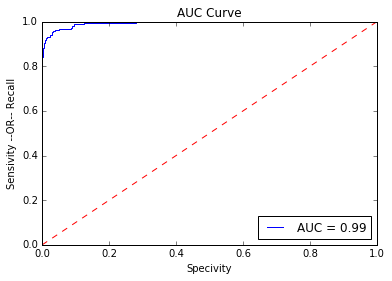

In [270]:
plt.title("AUC Curve")
plt.xlabel("Specivity")
plt.ylabel("Sensivity --OR-- Recall")
plt.plot(fp_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

In [271]:
# Hyperparameter tuning using Grid Search

In [273]:
# Grid search is a common method to select the hyperparameter values 
# that produce the best model. Grid search takes a set of possible values for each 
# hyperparameter that should be tuned, and evaluates a model trained on each 
# element of the Cartesian product of the sets. That is, grid search is an exhaustive 
# search that trains and evaluates a model for each possible combination of the 
# hyperparameter values supplied by the developer. A disadvantage of grid search 
# is that it is computationally costly for even small sets of hyperparameter values. 
# Fortunately, it is an embarrassingly parallel problem; many models can easily be 
# trained and evaluated concurrently since no synchronization is required between 
# the processes.

In [274]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation  import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [275]:
pipeline = Pipeline ( [
        ('vectorizer', TfidfVectorizer(stop_words='english')),
        ('clf', LogisticRegression())
    ]
)

In [276]:
pipeline

Pipeline(steps=[('vectorizer', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_id...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [277]:
parameters = {
    'vectorizer__max_df': (0.25, 0.5, 0.75),
    'vectorizer__stop_words': ('english', None),
    'vectorizer__max_features': (2500, 5000, 10000, None),
    'vectorizer__ngram_range':((1,1),(1,2)),
    'vectorizer__use_idf': (True, False),
    'vectorizer__norm': ('l1', 'l2'),
    'clf__penalty' : ('l1','l2'),
    'clf__C' : (0.01, 0.1, 1, 10),
}

In [278]:
# GridSearchCV() takes an estimator, a parameter space, and performance measure. 
# The argument n_jobs specifies the maximum number of concurrent jobs; set n_jobs 
# to -1 to use all CPU cores. Note that fit() must be called in a Python main block in 
# order to fork additional processes

In [281]:
if __name__ == "__main__":
    grid_search = GridSearchCV(pipeline, parameters, n_jobs = -1, verbose=1, scoring='accuracy', cv=3)
    df_3 = pd.read_csv("/home/topo/myRepos/github/mml_sklearn/datasets/smsspam/smsspam", delimiter = '\t', header = None)
    X_train, X_test, y_train, y_test = train_test_split(df_3[1], df_3[0])
    grid_search.fit(X_train, y_train)
    print 'Best score: %0.3f' % grid_search.best_score_
    print 'Best parameters set:'
    best_parameters = grid_search.best_estimator_.get_params()
    
    for param_name in sorted(best_parameters.keys()):
        print '\t%s: %r', (param_name, best_parameters[param_name])
        
    predictions = grid_search.predict(X_test)
    print 'Accuracy:', accuracy_score(y_test, predictions)
    print 'Precision:', precision_score(y_test, predictions)
    print 'Recall:', recall_score(y_test, predictions)
    

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 1198 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 1898 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2798 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3727 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4377 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed:  5.1min finished


Best score: 0.985
Best parameters set:
	%s: %r ('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))
	%s: %r ('clf__C', 10)
	%s: %r ('clf__class_weight', None)
	%s: %r ('clf__dual', False)
	%s: %r ('clf__fit_intercept', True)
	%s: %r ('clf__intercept_scaling', 1)
	%s: %r ('clf__max_iter', 100)
	%s: %r ('clf__multi_class', 'ovr')
	%s: %r ('clf__n_jobs', 1)
	%s: %r ('clf__penalty', 'l2')
	%s: %r ('clf__random_state', None)
	%s: %r ('clf__solver', 'liblinear')
	%s: %r ('clf__tol', 0.0001)
	%s: %r ('clf__verbose', 0)
	%s: %r ('clf__warm_start', False)
	%s: %r ('steps', [('vectorizer', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.5, max_features